In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [4]:
import pandas

ANIME_PATH = '/Users/devon/Desktop/personai_icartoonface_dettrain'

df = pandas.read_csv(ANIME_PATH + '/icartoonface_dettrain.csv', 
    names=['file', 'x1', 'y1', 'x2', 'y2'])


In [5]:
def get_bbox(row):
    return (row['x1'], row['y1'], row['x2'] - row['x1'], row['y2'] - row['y1'])

bbox_dict = {}
for idx, row in df.iterrows():
    fname = row['file']
    if fname in bbox_dict:
        bbox_dict[fname].append(get_bbox(row))
    else:
        bbox_dict[fname] = [get_bbox(row)]

In [6]:
k = list(bbox_dict.keys())

In [61]:
arr = df.to_numpy()
W = arr[:,3] - arr[:,1]
H = arr[:,4] - arr[:,2]
print(np.sum(W > 25))
print(np.sum(H > 25))

82561
84190


In [25]:
import sys
import importlib
import datagen
importlib.reload(datagen)

import matplotlib.pyplot as plt


gen = datagen.CartoonDataGenerator(ANIME_PATH, bbox_dict, k)

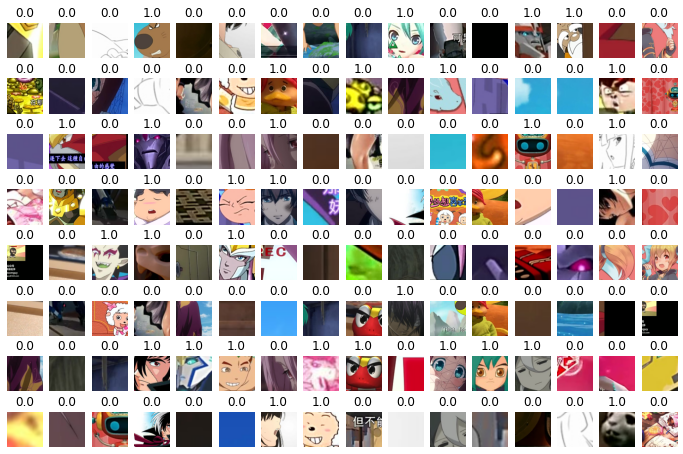

In [26]:
f, axarr = plt.subplots(8, 16, figsize=(12, 8))
axarr = axarr.ravel()

X, y = gen.__getitem__(100)
p = np.random.permutation(len(y))
X = X[p]
y = y[p]
y = y[:,np.newaxis]
for i in range(128):
    axarr[i].imshow(X[i, ...])
    axarr[i].set_title(str(y[i,0]))
    axarr[i].set_axis_off()

In [27]:
import pickle
model = keras.models.load_model('./modelout')
with open('./history.pkl', 'rb') as pfile:
    history = pickle.load(pfile)

In [34]:
predX = model.predict_on_batch(X)
model.evaluate(X, y, batch_size=128)

array([3.4759487e-10], dtype=float32)

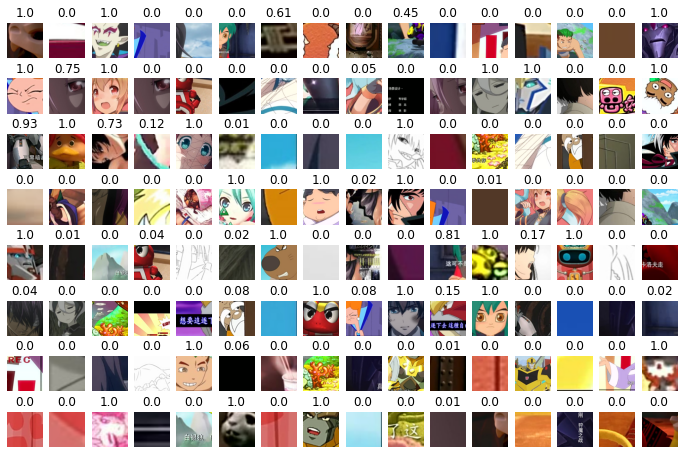

In [178]:
f, axarr = plt.subplots(8, 16, figsize=(12, 8))
axarr = axarr.ravel()

for i in range(128):
    axarr[i].imshow(X[i, ...])
    axarr[i].set_title(str(np.round(predX[i,0], decimals=2)))
    axarr[i].set_axis_off()

{'loss': [1.357204556465149, 0.7809051871299744, 0.6315451860427856, 0.5520729422569275, 0.5120993256568909, 0.4695756733417511, 0.4332951307296753, 0.40296921133995056, 0.37207889556884766, 0.3620641231536865], 'binary_accuracy': [0.834543764591217, 0.9010437726974487, 0.9146749973297119, 0.9218249917030334, 0.924875020980835, 0.9282562732696533, 0.9306562542915344, 0.9322124719619751, 0.934806227684021, 0.9348124861717224], 'val_loss': [0.9090608358383179, 0.7271173596382141, 0.6183264851570129, 0.5872774124145508, 0.5341367125511169, 0.5064793229103088, 0.46047303080558777, 0.4595838785171509, 0.43137550354003906, 0.417397141456604], 'val_binary_accuracy': [0.8873698115348816, 0.9072515964508057, 0.9168168902397156, 0.9175680875778198, 0.9216246008872986, 0.9258062839508057, 0.9272586107254028, 0.9269581437110901, 0.9296875, 0.9295622706413269]}


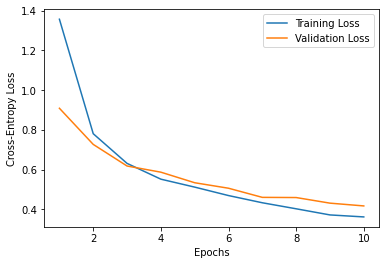

In [171]:
print(history)
plt.plot(np.arange(1, 11), history['loss'], label='Training Loss')
plt.plot(np.arange(1, 11), history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.show()

In [262]:
def gen_heatmap(img):
    pts_x = np.arange(0, img.shape[1] - 224, 32)
    pts_y = np.arange(0, img.shape[0] - 224, 32)
    all_pts_x = np.array([pts_x for _ in pts_y]).ravel()
    all_pts_y = np.array([pts_y for _ in pts_x]).T.ravel()

    hmap = np.zeros(img.shape[:2])
    for i in range(len(all_pts_x)):
        if i % (len(all_pts_x) // 4) == 0:
            print(i, '/', len(all_pts_x))
        curr_x = all_pts_x[i]
        curr_y = all_pts_y[i]
        patch = img[curr_y : curr_y + 224, curr_x : curr_x + 224, :]
        val = model.predict(patch[np.newaxis, ...])
        # if val > 0.95:
        hmap[curr_y : curr_y + 224, curr_x : curr_x + 224] += val
    return hmap

(480, 848, 3)
0 / 160
40 / 160
80 / 160
120 / 160


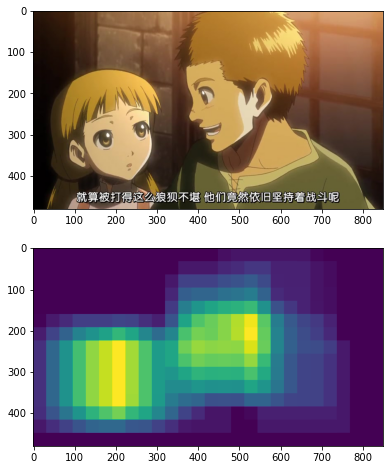

In [265]:
testImg = plt.imread(ANIME_PATH + '/icartoonface_dettrain/' + k[4321])
print(testImg.shape)
hmap = gen_heatmap(testImg)
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2,1,1)
plt.imshow(testImg)
fig.add_subplot(2,1,2)
plt.imshow(hmap)

(480, 592, 3)
0 / 96
24 / 96
48 / 96
72 / 96


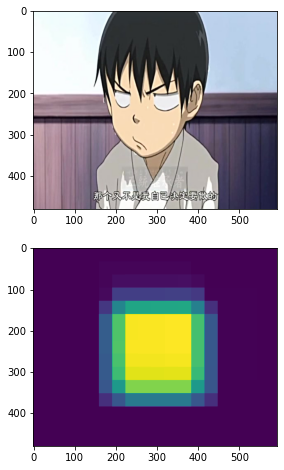

In [263]:
testImg = plt.imread(ANIME_PATH + '/icartoonface_dettrain/' + k[29975])
print(testImg.shape)
hmap = gen_heatmap(testImg)
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2,1,1)
plt.imshow(testImg)
fig.add_subplot(2,1,2)
plt.imshow(hmap)

(504, 896, 3)
0 / 189
47 / 189
94 / 189
141 / 189
188 / 189


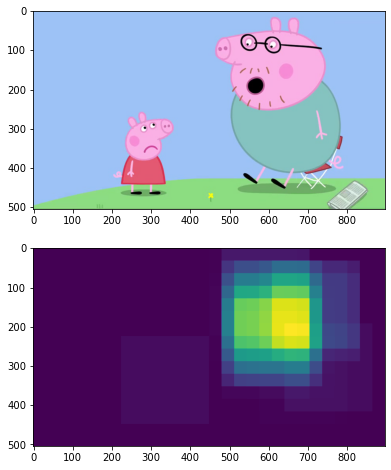

In [264]:
testImg = plt.imread(ANIME_PATH + '/icartoonface_dettrain/' + k[11232])
print(testImg.shape)
hmap = gen_heatmap(testImg)
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2,1,1)
plt.imshow(testImg)
fig.add_subplot(2,1,2)
plt.imshow(hmap)

(480, 848, 3)
0 / 160
40 / 160
80 / 160
120 / 160


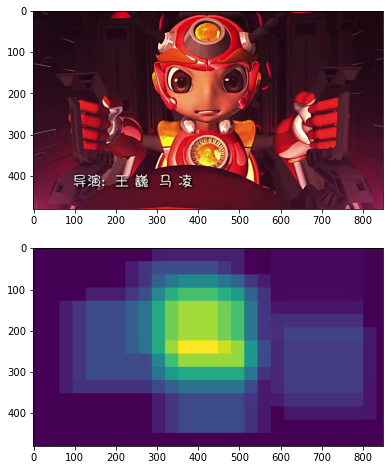

In [270]:
testImg = plt.imread(ANIME_PATH + '/icartoonface_dettrain/' + k[33392])
print(testImg.shape)
hmap = gen_heatmap(testImg)
fig = plt.figure(figsize=(8,8))
fig.add_subplot(2,1,1)
plt.imshow(testImg)
fig.add_subplot(2,1,2)
plt.imshow(hmap)

In [7]:
print(k[11232])

personai_icartoonface_dettrain_22378.jpg


In [129]:
import pickle

with open('tmprects.pkl', 'rb') as pfile:
    rects, rects_conf = pickle.load(pfile)

563


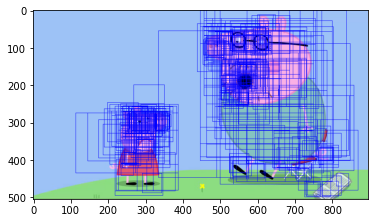

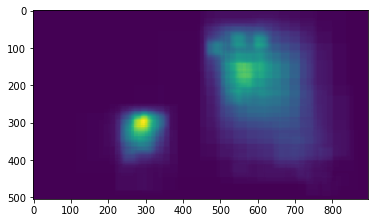

In [143]:
import matplotlib.pyplot as plt
import cv2

print(len(rects_conf))

img = plt.imread(ANIME_PATH + '/icartoonface_dettrain/' + k[11232])
hmap = np.zeros(img.shape[:2])
for i in range(len(rects)):
    currRect = np.int32(rects[i,:])
    img = cv2.rectangle(img, (currRect[0], currRect[1]), (currRect[0] + currRect[2], currRect[1] + currRect[3]), (0, 0, 255))
    hmap[currRect[1] : currRect[1] + currRect[3], currRect[0] : currRect[0] + currRect[2]] += rects_conf[i]

plt.imshow(img)
plt.show()
plt.imshow(hmap)
plt.show()

In [151]:
import importlib
import util
importlib.reload(util)

overlap_threshold = 0.1

def NMS_Max(rects, rects_conf):
    final_rects = []
    final_confs = []
    idxs = np.argsort(rects_conf)
    for i in range(len(rects)):
        # curr rect
        idx_i = idxs[i]
        include = True
        for j in range(i+1, len(rects)):
            # comparison rect
            idx_j = idxs[j]
            if util.IoU(rects[idx_i], rects[idx_j]) > overlap_threshold:
                include = False
                break
        if include:
            final_rects.append(rects[idx_i])
            final_confs.append(rects_conf[idx_i])

    return np.array(final_rects), np.array(final_confs)

def Soft_NMS(rects, rects_conf):
    rects_conf = rects_conf.copy()
    final_rects = []
    final_confs = []
    idxs = np.argsort(rects_conf)
    for i in range(len(rects)):
        # curr rect (low score)
        idx_i = idxs[i]
        for j in range(i+1, len(rects)):
            # comparison rect
            idx_j = idxs[j]
            if util.IoU(rects[idx_i], rects[idx_j]) > overlap_threshold:
                rects_conf[idx_i] = rects_conf[idx_i] * (1 - util.IoU(rects[idx_i], rects[idx_j]))

        final_rects.append(rects[idx_i])
        final_confs.append(rects_conf[idx_i])

    return np.array(final_rects), np.array(final_confs)

[0.54126352 0.84177756 0.88483834 0.90819848 1.         1.
 1.         1.         1.        ]


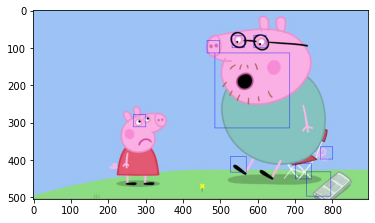

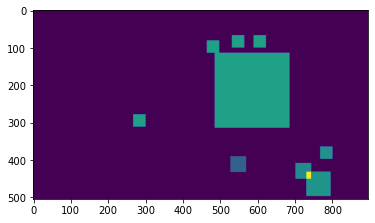

In [152]:
out_rects, out_confs = NMS_Max(rects, rects_conf)
print(out_confs)

img = plt.imread(ANIME_PATH + '/icartoonface_dettrain/' + k[11232])
hmap = np.zeros(img.shape[:2])
for i in range(len(out_rects)):
    currRect = np.int32(out_rects[i,:])
    img = cv2.rectangle(img, (currRect[0], currRect[1]), (currRect[0] + currRect[2], currRect[1] + currRect[3]), (0, 0, 255))
    hmap[currRect[1] : currRect[1] + currRect[3], currRect[0] : currRect[0] + currRect[2]] += out_confs[i]

plt.imshow(img)
plt.show()
plt.imshow(hmap)
plt.show()

[0.54126352 0.84177756 0.88483834 0.90819848 0.70578942 0.68373355
 0.72297221 0.5231909  1.         1.         1.         0.53470403
 1.         0.93128052 1.        ]


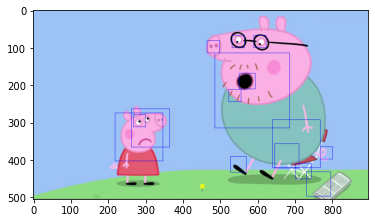

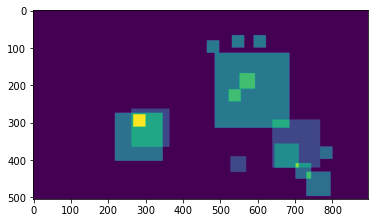

In [153]:
out_rects, out_conf = Soft_NMS(rects, rects_conf)
idxs = out_conf > 0.5

out_rects = out_rects[idxs]
out_conf = out_conf[idxs]
print(out_conf)

img = plt.imread(ANIME_PATH + '/icartoonface_dettrain/' + k[11232])
hmap = np.zeros(img.shape[:2])
for i in range(len(out_rects)):
    currRect = np.int32(out_rects[i,:])
    img = cv2.rectangle(img, (currRect[0], currRect[1]), (currRect[0] + currRect[2], currRect[1] + currRect[3]), (0, 0, 255))
    hmap[currRect[1] : currRect[1] + currRect[3], currRect[0] : currRect[0] + currRect[2]] += out_conf[i]

plt.imshow(img)
plt.show()
plt.imshow(hmap)
plt.show()
